# Answering questions

In [30]:
# Import packages
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import cm as CM
from matplotlib import mlab as ML
import pandas as pd
import numpy as np

# Read in data
df = pd.read_csv('../output.csv')
print "Data types:"
print df.dtypes

Data types:
cx          int64
cy          int64
cz          int64
unmasked    int64
synapses    int64
dtype: object


## Descriptive
* How many Nan, Inf, or other "bad" data values are there?

In [31]:
isNan = df.isnull()
isInf = np.isinf(df)
isNeg = df < 0

print "Number of nan values by column:"
print isNan.sum(), "\n"
print "Number of rows with nan values:", isNan.sum(1).sum(), "\n"

print "Number of inf values by column:"
print isInf.sum(), "\n"
print "Number of rows with inf values:", isInf.sum(1).sum(), "\n"

print "Number of negative values by column:"
print isNeg.sum(), "\n"
print "Number of rows with negative values:", isNeg.sum(1).sum(), "\n"

Number of nan values by column:
cx          0
cy          0
cz          0
unmasked    0
synapses    0
dtype: int64 

Number of rows with nan values: 0 

Number of inf values by column:
cx          0
cy          0
cz          0
unmasked    0
synapses    0
dtype: int64 

Number of rows with inf values: 0 

Number of negative values by column:
cx          0
cy          0
cz          0
unmasked    0
synapses    0
dtype: int64 

Number of rows with negative values: 0 



### Quantities
 * How many synapses total are there?

In [32]:
nSyn = df['synapses'].sum()
print "There are", nSyn, "total synapses in the data."

There are 7704178 total synapses in the data.


 * How many bins are there?

In [33]:
nBins = df['synapses'].count()
print "There are", nBins, "total 3D bins."

There are 61776 total 3D bins.


### Statistics
 * What's the maximum number of synapses within a bin?

In [34]:
print "The maximum number of synapses per bin is", df['synapses'].max()

The maximum number of synapses per bin is 507


 * What's the mean number of synapses within a bin?

In [35]:
print "The average number of synapses per bin is {:0.2f}".format(float(nSyn)/nBins)

The average number of synapses per bin is 124.71


 * What's the median number of synapses per bin?

In [36]:
print "The median number of synapses per bin is {:0.0f}".format(df['synapses'].median())

The median number of synapses per bin is 144


 * What's the standard deviation?

In [37]:
print "The standard deviation of the number of synapses per bin is {:0.3f}".format(df['synapses'].std())

The standard deviation of the number of synapses per bin is 91.998


* What is the resolution of the scanned volume?

In [38]:
# Calculate resolution
temp = df.max() - df.min()
n = [df.groupby(d).ngroups for d in ['cx','cy','cz']]
res = [temp[i]/(n[i] - 1) for i in range(3)]

# guessing units based on Bock 2011 article
print "The resolution of the scanned volume is", float(res[0])/10, "x", float(res[1])/10, "x", float(res[2])/20,"um^3"

The resolution of the scanned volume is 3.9 x 3.9 x 5.55 um^3


* What is the size of the scanned volume?

In [39]:
# Calculate dimensions
dims = [temp[i]+res[i] for i in range(3)]

# guessing units based on Bock 2011 article
print "The dimensions of the scanned volume are", float(dims[0])/10, "x", float(dims[1])/10, "x", float(dims[2])/20,"um^3"

The dimensions of the scanned volume are 421.2 x 202.8 x 61.05 um^3


## Exploratory
* What's the distribution of the # synapses along the x, y, z dimensions?

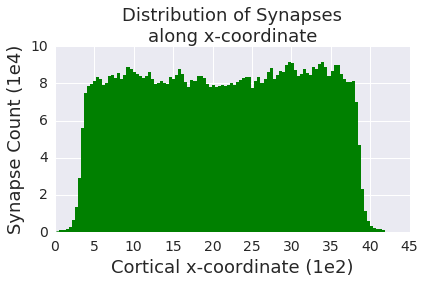

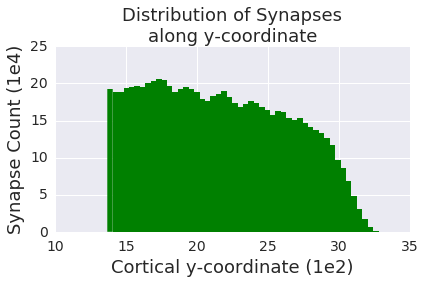

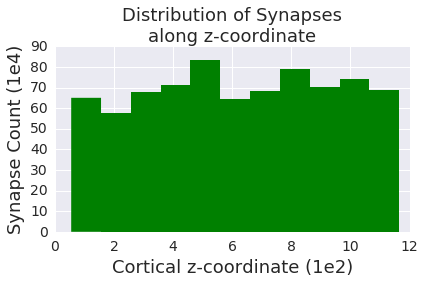

In [40]:
fs = 18
lfs = 14

plt.hist(df['cx']/100, weights=df['synapses']/1e4, bins=df['cx'].unique().shape[0], color='g', edgecolor='none')
plt.title('Distribution of Synapses\nalong x-coordinate', fontsize = fs)
plt.xlabel('Cortical x-coordinate (1e2)', fontsize = fs)
plt.ylabel('Synapse Count (1e4)', fontsize = fs)
plt.tick_params(axis='both', which='major', labelsize=lfs)
plt.tight_layout()
plt.savefig('./figs/AndrewFigs/histX.png', format='png', dpi=300)
plt.show()

plt.hist(df['cy']/100, weights=df['synapses']/1e4, bins=df['cy'].unique().shape[0], color='g', edgecolor='none')
plt.title('Distribution of Synapses\nalong y-coordinate', fontsize = fs)
plt.xlabel('Cortical y-coordinate (1e2)', fontsize = fs)
plt.ylabel('Synapse Count (1e4)', fontsize = fs)
plt.tick_params(axis='both', which='major', labelsize=lfs)
plt.tight_layout()
plt.savefig('./figs/AndrewFigs/histY.png', format='png', dpi=300)
plt.show()

plt.hist(df['cz']/100, weights=df['synapses']/1e4, bins=df['cz'].unique().shape[0], color='g', edgecolor='none')
plt.title('Distribution of Synapses\nalong z-coordinate', fontsize = fs)
plt.xlabel('Cortical z-coordinate (1e2)', fontsize = fs)
plt.ylabel('Synapse Count (1e4)', fontsize = fs)
plt.tick_params(axis='both', which='major', labelsize=lfs)
plt.tight_layout()
plt.savefig('./figs/AndrewFigs/histZ.png', format='png', dpi=300)
plt.show()

* What's the distribution of the # synapses in X-Y, X-Z, and X-Y planes?

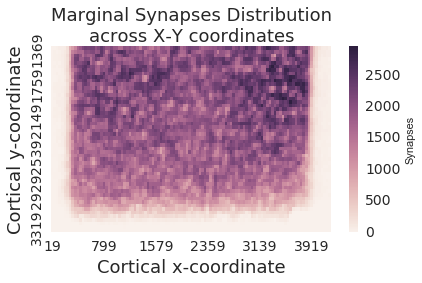

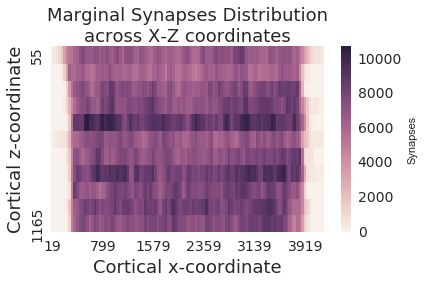

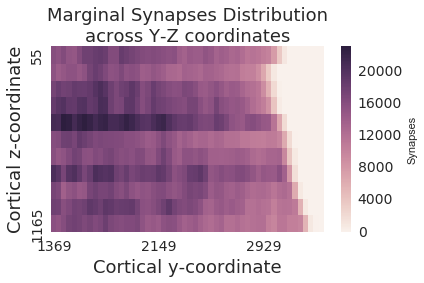

In [41]:
sumXY = pd.pivot_table(df, index='cy', columns='cx', values='synapses', aggfunc=np.sum)
sumXZ = pd.pivot_table(df, index='cz', columns='cx', values='synapses', aggfunc=np.sum)
sumYZ = pd.pivot_table(df, index='cz', columns='cy', values='synapses', aggfunc=np.sum)

import seaborn as sns

plt.figure()
sns.heatmap(sumXY, xticklabels=20, yticklabels=10, cbar_kws={'label': 'Synapses'});
plt.xlabel('Cortical x-coordinate', fontsize = fs)
plt.ylabel('Cortical y-coordinate', fontsize = fs)
plt.tick_params(axis='both', which='major', labelsize=lfs)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=lfs)
plt.title('Marginal Synapses Distribution\nacross X-Y coordinates',fontsize = fs);
plt.tight_layout()
plt.savefig('./figs/AndrewFigs/heatXY.png', format='png', dpi=300)
plt.show()

plt.figure()
sns.heatmap(sumXZ, xticklabels=20, yticklabels=10, cbar_kws={'label': 'Synapses'});
plt.xlabel('Cortical x-coordinate', fontsize = fs)
plt.ylabel('Cortical z-coordinate', fontsize = fs)
plt.tick_params(axis='both', which='major', labelsize=lfs)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=lfs)
plt.title('Marginal Synapses Distribution\nacross X-Z coordinates',fontsize = fs);
plt.tight_layout()
plt.savefig('./figs/AndrewFigs/heatXZ.png', format='png', dpi=300)
plt.show()

plt.figure()
sns.heatmap(sumYZ, xticklabels=20, yticklabels=10, cbar_kws={'label': 'Synapses'});
plt.xlabel('Cortical y-coordinate', fontsize = fs)
plt.ylabel('Cortical z-coordinate', fontsize = fs)
plt.tick_params(axis='both', which='major', labelsize=lfs)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=lfs)
plt.title('Marginal Synapses Distribution\nacross Y-Z coordinates',fontsize = fs);
plt.tight_layout()
plt.savefig('./figs/AndrewFigs/heatYZ.png', format='png', dpi=300)
plt.show()

* What does the distribution of # synapses per bin look like?

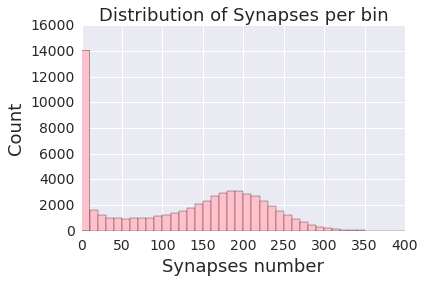

In [42]:
fig_syn = plt.figure()
asyn = fig_syn.add_subplot(111)
asyn.hist(df['synapses'], bins = 40, range = (df['synapses'].min(), 400),
         color = 'pink')
plt.title('Distribution of Synapses per bin', fontsize = fs)
plt.xlabel('Synapses number', fontsize = fs)
plt.ylabel('Count',fontsize = fs)
plt.tick_params(axis='both', which='major', labelsize=lfs)
plt.tight_layout()
plt.savefig('./figs/AndrewFigs/histSyn.png', format='png', dpi=300)
plt.show()

* What do some representative slices look like?

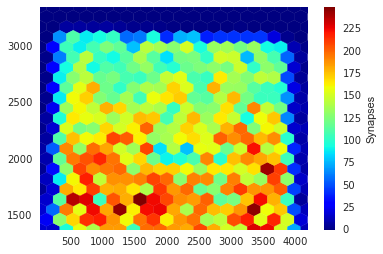

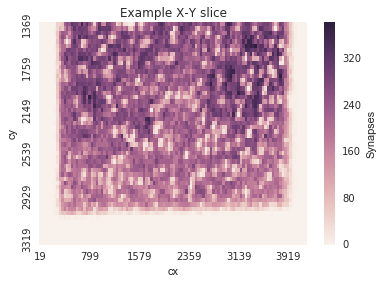

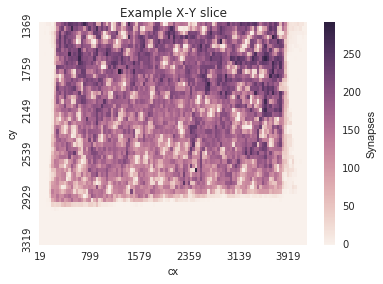

In [43]:
df_1 = df[df['cz'] == 610]

X = df_1['cx']
Y = df_1['cy']
Z = df_1['synapses'] 

x = X.ravel()
y = Y.ravel()
z = Z.ravel()
gridsize = 20
plt.subplot(111)

plt.hexbin(x, y, C = z, gridsize = gridsize, cmap=CM.jet, bins = None)
plt.axis([x.min(), x.max(), y.min(), y.max()])

cb = plt.colorbar()
cb.set_label('Synapses')
plt.show()   


exampleXY = pd.pivot_table(df[df['cz']==499], index='cy', columns='cx', values='synapses', aggfunc=np.sum)

plt.figure()
sns.heatmap(exampleXY, xticklabels=20, yticklabels=10, cbar_kws={'label': 'Synapses'});
plt.title('Example X-Y slice');

exampleXY = pd.pivot_table(df[df['cz']==166], index='cy', columns='cx', values='synapses', aggfunc=np.sum)

plt.figure()
sns.heatmap(exampleXY, xticklabels=20, yticklabels=10, cbar_kws={'label': 'Synapses'});
plt.title('Example X-Y slice');


* What is the data looks like in boxplot? Are there any outliers?

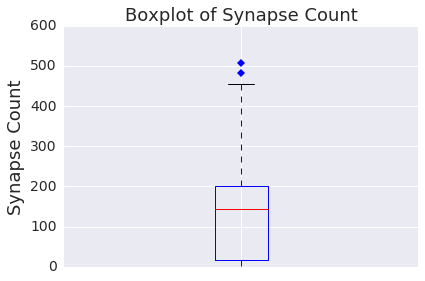

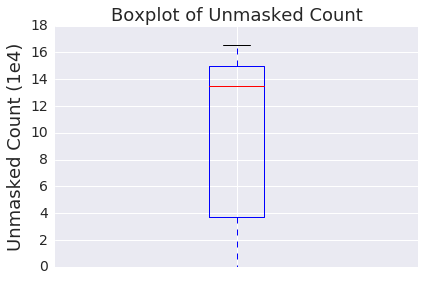

In [44]:

dfT = df.values.T.tolist()
col = [dfT[i] for i in [4]]

fig = plt.figure()
ax = fig.add_subplot(111)
bp = ax.boxplot(col, 0, 'gD')
plt.title('Boxplot of Synapse Count',fontsize = fs)
plt.xticks([1],'')
plt.ylabel('Synapse Count', fontsize = fs)
plt.tick_params(axis='both', which='major', labelsize=lfs)
plt.tight_layout()
plt.savefig('./figs/AndrewFigs/boxSyn.png', format='png', dpi=300)
plt.show()

unmask = dfT[3]
fig = plt.figure()
ax = fig.add_subplot(111)
bp = ax.boxplot(np.asarray(unmask)/1e4, 0, 'gD')
plt.title('Boxplot of Unmasked Count',fontsize = fs)
plt.xticks([1],'')
plt.ylabel('Unmasked Count (1e4)', fontsize = fs)
plt.tick_params(axis='both', which='major', labelsize=lfs)
plt.tight_layout()
plt.savefig('./figs/AndrewFigs/boxUm.png', format='png', dpi=300)
plt.show()